In [1]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression #function used for generating synthetic datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression


fruits = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
fruits


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# What is zipping, let's see on an example:

a = ("John", "Charles", "Mike", "Mike","Charles")
b = ("Jenny", "Christy", "Monica")

x = zip(a, b)

for i in x:
    print(i)

('John', 'Jenny')
('Charles', 'Christy')
('Mike', 'Monica')


In [4]:
(fruits.fruit_label.unique())

array([1, 2, 3, 4], dtype=int64)

In [5]:
(fruits.fruit_name.unique())

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [6]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

#### Let's examine the data a little bit. 


In [7]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

X_fruits = fruits[feature_names_fruits]
X_fruits.head()

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59
2,7.2,7.4,176,0.60
3,4.7,6.2,86,0.80
4,4.6,6.0,84,0.79


In [8]:

y_fruits = fruits['fruit_label']
y_fruits.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

<IPython.core.display.Javascript object>


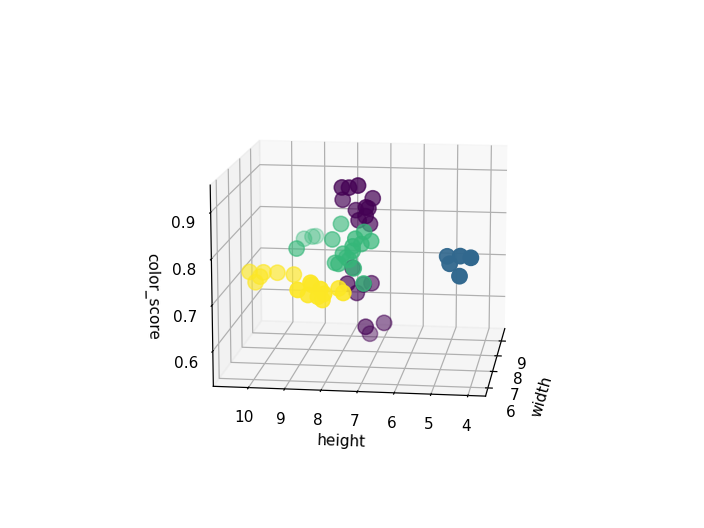

In [9]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_fruits['width'], X_fruits['height'], X_fruits['color_score'], 
           c = y_fruits, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = \
train_test_split(X_fruits, y_fruits, random_state = 0)

#clf = LogisticRegression(C=100).fit(X_train, y_train) #alpha= 0=> overfit

clftemp = LogisticRegression(C=100)

clf = clftemp.fit(X_train, y_train) #alpha= 0=> overfit



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
clf.intercept_

array([-0.67489048,  1.28353681,  0.18303212, -0.79167845])

In [12]:
clf.coef_

array([[-4.2556718 ,  1.69782316,  0.16337581, -0.1558837 ],
       [ 0.88002269,  5.7108092 , -0.37867174,  1.03021393],
       [-2.00557267, -1.50515071,  0.19554521, -0.02194107],
       [ 5.38122178, -5.90348164,  0.01975073, -0.85238916]])

### Why do we see too many coefficients here? There should be only one???

### I will make it simpler. 


### Now I want to start with a simpler analysis. Hence I use only two of the features at first. 



In [ ]:
X_fruits_2d = fruits[['height', 'width']] 
# or you can use the following
#X_fruits_2d = fruits.loc[:, ['height', 'width']] # we use loc since this is a dataframe. 

y_fruits_2d = fruits['fruit_label']


X_fruits_2d.head()



 ## I also convert the problem into a apple vs non-apple problem. That is normally, there are 4 different types of fruits in the dataset. I will change the labels of the apple to _True_ and the remaining ones are _False_. 

In [ ]:
y_fruits_2d == 1 

In [ ]:
# 
# I will convert the problem into apple vs not apple problem. 

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
#y_fruits_apple = y_fruits_2d    # make into a binary problem: apples vs everything else

y_fruits_apple.head()

In [ ]:
X_train, X_test, y_train, y_test = \
train_test_split(X_fruits_2d, y_fruits_apple, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=100).fit(X_train, y_train)

print("The coefficients are",clf.coef_)


In [ ]:
clf.intercept_

### Now please go to the very first lines where you have multiple theta values.

#### We will plot the decision boundaries:

In [ ]:
# Recall that the decision boundary for the logistic regression is the equation where the 
# theta0 + theta1 x1 + theta2 x2= 0. 
# Hence we need to find the equation of this line to plot it

Plot_b0 = -clf.intercept_/clf.coef_[0,1] # -b/w2
Plot_b1 = -clf.coef_[0,0]/clf.coef_[0,1] # -w1/w2

# I will use them to plot the results. 

In [ ]:
Plot_b1

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Sample regression problem with one input variable')

X_fruits_2d_apple = X_fruits_2d[y_fruits_apple==True]
X_fruits_2d_non_apple = X_fruits_2d[y_fruits_apple==False]


plt.scatter(X_fruits_2d_apple.iloc[:,0], 
            X_fruits_2d_apple.iloc[:,1], 
            marker= 'o', s=50)

plt.scatter(X_fruits_2d_non_apple.iloc[:,0], 
            X_fruits_2d_non_apple.iloc[:,1], 
            marker= 'x', s=50)

plt.plot(X_fruits_2d_non_apple.iloc[:,0], 
         Plot_b0 + Plot_b1 * X_fruits_2d_non_apple.iloc[:,0], 
         'r-')

plt.show()

In [ ]:
# Or an easier way to plot the same data

In [ ]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#000000', '#FFFF00','#0000FF', '#00FF00' ])

plt.figure()
plt.title('Sample binary classification problem with two informative features')
 
plt.scatter(X_fruits_2d.iloc[:,0], 
            X_fruits_2d.iloc[:,1], 
            c=y_fruits_apple,
           marker= 'o', s=50, cmap=cmap_bold)

plt.plot(X_fruits_2d_non_apple.iloc[:,0], 
         Plot_b0 + Plot_b1 * X_fruits_2d_non_apple.iloc[:,0]  , 
         'r-')

plt.show()

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
# Now I want to predict
h = 6
w = 6

clf.predict([[h,w]])


In [ ]:
# Now I want to predict
h = 6
w = 8
clf.predict([[h,w]])[0]

In [ ]:
# You can try  the following at home. 
## print([15,22][True])
## print([15,22][False])
## ['not an apple', 'an apple'][False]
##['not an apple', 'an apple'][clf.predict([[h,w]])[0]]
## print('A fruit with height {} and width {} is predicted to be: {}'
   ##  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
    
h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

### Logistic regression on simple synthetic dataset

#### First let's generate the data set. You can try it at home. 

In [ ]:
# synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()

plt.title('Sample binary classification problem with two informative features')

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], 
            X_C2[:, 1], 
            c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [ ]:
y_C2

### I use the some of the built functions provided by 
### Applied Machine Learning in Python_ course in Coursera.

They have better plotting functions and they enable us to download some of the datasets that are provided only by coursera.
You can use them if you wish but it's not a must.

In [ ]:
import adspy_shared_utilities as asu

X_train, X_test, y_train, y_test = \
train_test_split(X_C2, y_C2,random_state = 0)

clf = LogisticRegression().fit(X_train, y_train) # by default it's one. 

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
asu.plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)



In [ ]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     


In [ ]:
# Logistic Regression with many classes. 

### Use a real dataset: Breast Cancer
#### Try it at home. 

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [ ]:
y_cancer.shape

In [ ]:
pd.DataFrame(X_cancer)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


### You can use the scaling if you wish. 
#### Try it @ home. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

X_test_scaled.head() #scaled version for 4 features. 